# Sentiment Analysis of Airline Tweets

* Sentiment analysis refers to analyzing an opinion or feelings about something using data like text or images, regarding almost anything.

* Airline tweet sentiment analysis involves analyzing tweets related to airlines to determine the sentiment behind them, whether positive, negative, or neutral.

* Given tweets about six US airlines, the task is to predict whether a tweet contains positive, negative, or neutral sentiment about the airline. This is a typical supervised learning task where given a text string, we have to categorize the text string into predefined categories.  


### Data Import and Preprocessing

In [194]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [195]:
#loading the data
url = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/Tweets.csv"
df = pd.read_csv(url)


In [196]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [197]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [198]:
df.shape

(14640, 15)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [200]:
# change tweet_created from str to datetime
df.tweet_created=pd.to_datetime(df.tweet_created)

In [201]:
#Add new column tweet_created_date
df['tweet_created_date']=df.tweet_created.dt.date
#df.head()

In [202]:
#unique count on each coloumn
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
tweet_created_date                  9
dtype: int64

In [203]:
print('airline_sentiment:',df.airline_sentiment.unique())
print('\nairline_sentiment_gold:',df.airline_sentiment_gold.unique())
print('\nairline:',df.airline.unique())
print('\nnegative reason:',df.negativereason.unique())

airline_sentiment: ['neutral' 'positive' 'negative']

airline_sentiment_gold: [nan 'negative' 'neutral' 'positive']

airline: ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']

negative reason: [nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']


In [204]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_created                       0
tweet_created_date                  0
dtype: int64

In [205]:
# percentage of null values in each column
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
tweet_created_date               0.00
dtype: float64

* tweet_coord , airline_sentiment_gold, negativereason_gold have more than 90% missing data.
*  It will be better to delete these columns as they will not provide any constructive information.

In [207]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,tweet_created_date
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),2015-02-24
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),2015-02-24
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),2015-02-24
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),2015-02-24
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),2015-02-24


In [208]:
df.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
tweet_created_date                 0
dtype: int64

In [209]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(10)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,tweet_created_date
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),2015-02-24
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),2015-02-24
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),2015-02-24
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),2015-02-24
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),2015-02-24
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33-08:00,NaN,Pacific Time (US & Canada),2015-02-24
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57-08:00,San Francisco CA,Pacific Time (US & Canada),2015-02-24
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29-08:00,Los Angeles,Pacific Time (US & Canada),2015-02-24
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19-08:00,San Diego,Pacific Time (US & Canada),2015-02-24
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27-08:00,Los Angeles,Eastern Time (US & Canada),2015-02-24


In [210]:
# To check any duplicate rows
df.duplicated().sum()

39

In [211]:
#drop duplicares
df.drop_duplicates(inplace=True)

### Basic Statistical Details and Visualization

In [213]:
# Statistical Details of numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14601.0,5.692156e+17,7.782706e+14,5.675883e+17,5.685581e+17,5.694720e+17,5.698884e+17,5.703106e+17
airline_sentiment_confidence,14601.0,8.999022e-01,1.629654e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10501.0,6.375749e-01,3.303735e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
retweet_count,14601.0,8.280255e-02,7.467231e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [214]:
#Statistical Details of categorical Columns
str_cols=df.select_dtypes("object").columns
data=df[str_cols].describe().T.reset_index()
data

,index,count,unique,top,freq
0,airline_sentiment,14601,3,negative,9157
1,negativereason,9157,10,Customer Service Issue,2902
2,airline,14601,6,United,3822
3,name,14601,7701,JetBlueNews,63
4,text,14601,14427,@united thanks,6
5,tweet_location,9879,3081,"Boston, MA",157
6,user_timezone,9789,85,Eastern Time (US & Canada),3738
7,tweet_created_date,14601,9,2015-02-22,3077


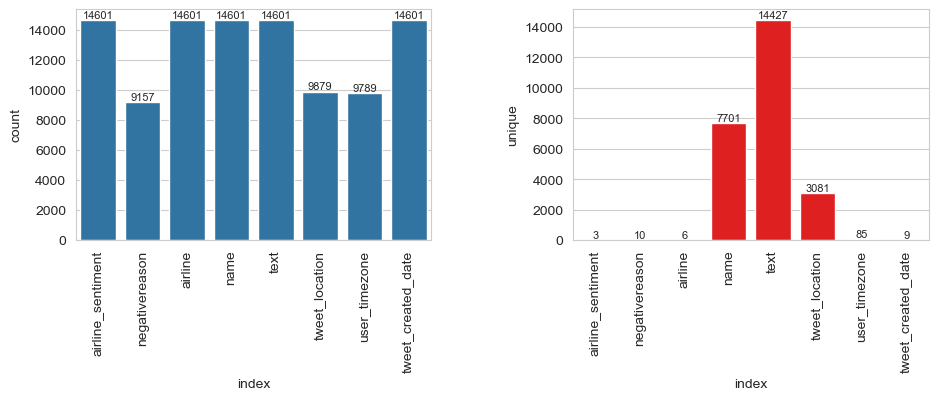

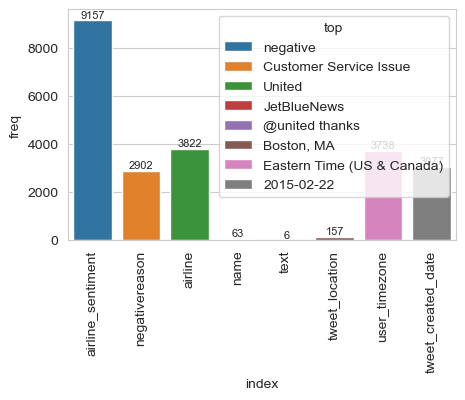

In [215]:
plt.figure(figsize=(11,3))
plt.subplot(121)
plot=sns.barplot(data=data,x='index',y='count')
for i in plot.containers:
    plot.bar_label(i,label_type='edge',fontsize=8)
plt.xticks(rotation=90)

plt.subplot(122)
plot=sns.barplot(data=data,x='index',y='unique',color='red')
for i in plot.containers:
    plot.bar_label(i,label_type='edge',fontsize=8)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.4, hspace=0.4) 
plt.show()

print('\n')

plt.figure(figsize=(5,3))
plot=sns.barplot(data=data,x='index',y='freq',hue='top')
for i in plot.containers:
    plot.bar_label(i,label_type='edge',fontsize=8)
plt.xticks(rotation=90)

plt.show()


<Axes: ylabel='count'>

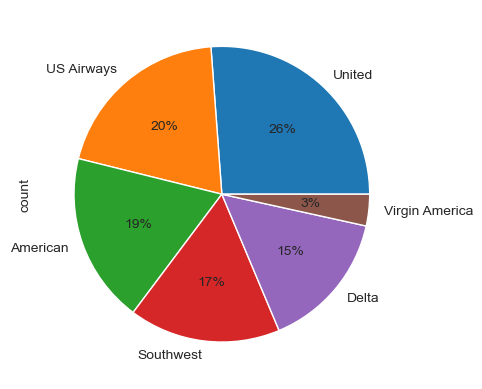

In [216]:
# PLot pie chart showing the airline split
df.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='count'>

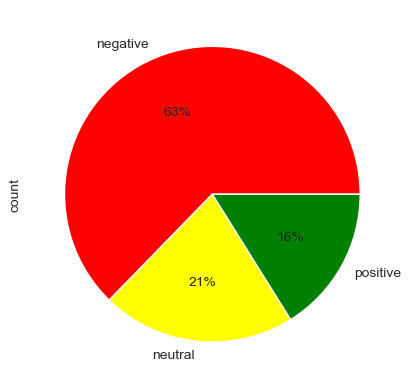

In [217]:
# percentage of airline_sentiment
df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])


 		 Airline Sentiment in each Airline




<Figure size 1100x500 with 0 Axes>

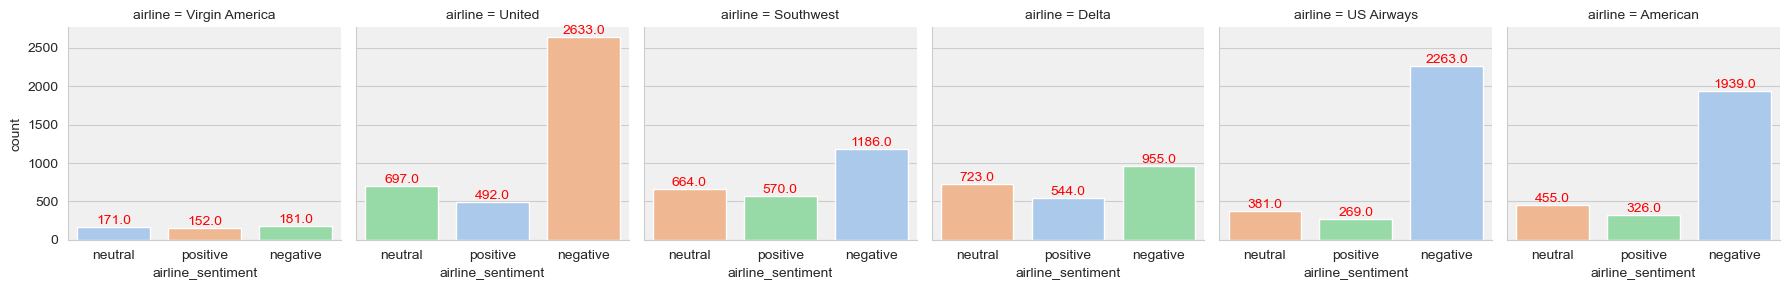

In [218]:
# Airline Sentiment in each Airline
print('\n \t\t Airline Sentiment in each Airline\n\n')
plt.figure(figsize=(11,5))
g = sns.FacetGrid(df, col='airline', margin_titles=True)
g.map(sns.countplot, "airline_sentiment",palette='pastel')

# Set the background color for each subplot
for ax in g.axes.flat:
    ax.set_facecolor('#f0f0f0')  # Light gray background

# Add text labels for each bar in the countplot
for ax in g.axes.flat:
    # Get the counts for each category in the axis
    for p in ax.patches:  # Iterate over each bar
        ax.annotate(format(p.get_height()),  # Get the height of the bar
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                    ha='center', va='bottom',  # Center the text horizontally and position it above the bar
                    fontsize=10, color='red')  # Text properties

plt.show()
         

### Word Cloud 
* It is a great way to visualize the frequency of words in a text dataset
* Wordcloud is a great tool for visualizing nlp data.
* The larger the words in the wordcloud image , the more is the frequency of that word in our text data.



In [220]:
#!pip install wordcloud matplotlib
from wordcloud import WordCloud,STOPWORDS

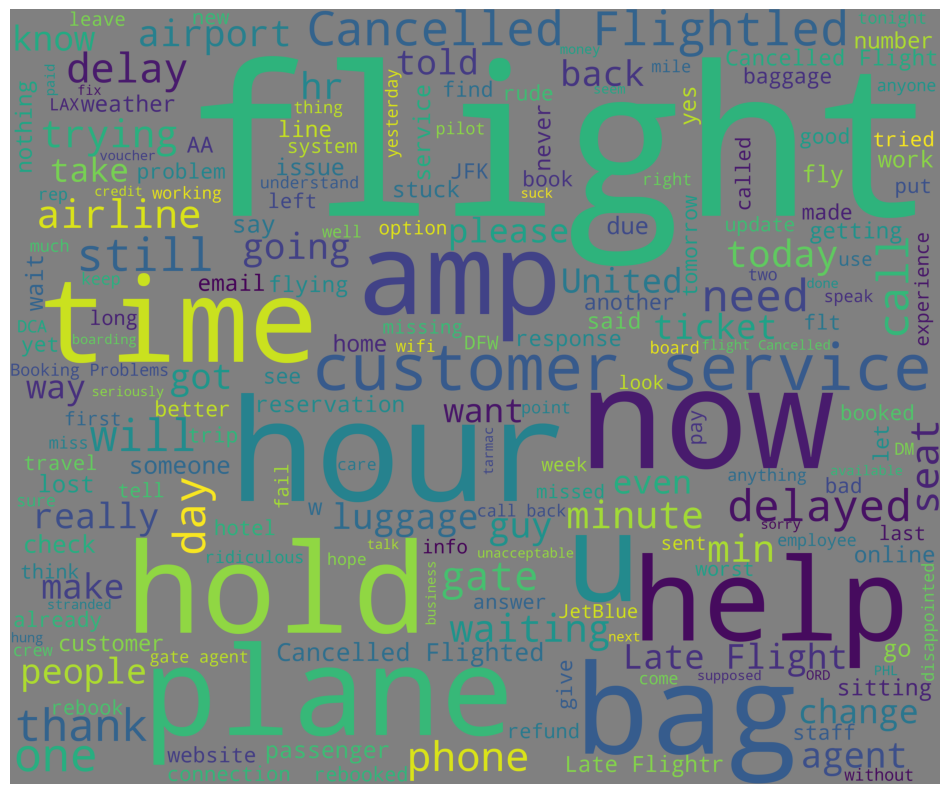

In [221]:
# Word_Cloud for -ve reasons
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='grey',
                      width=3000,
                      height=2500,
                      colormap='viridis'
                     ).generate(cleaned_word)
plt.figure(figsize=(12, 12))                    
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

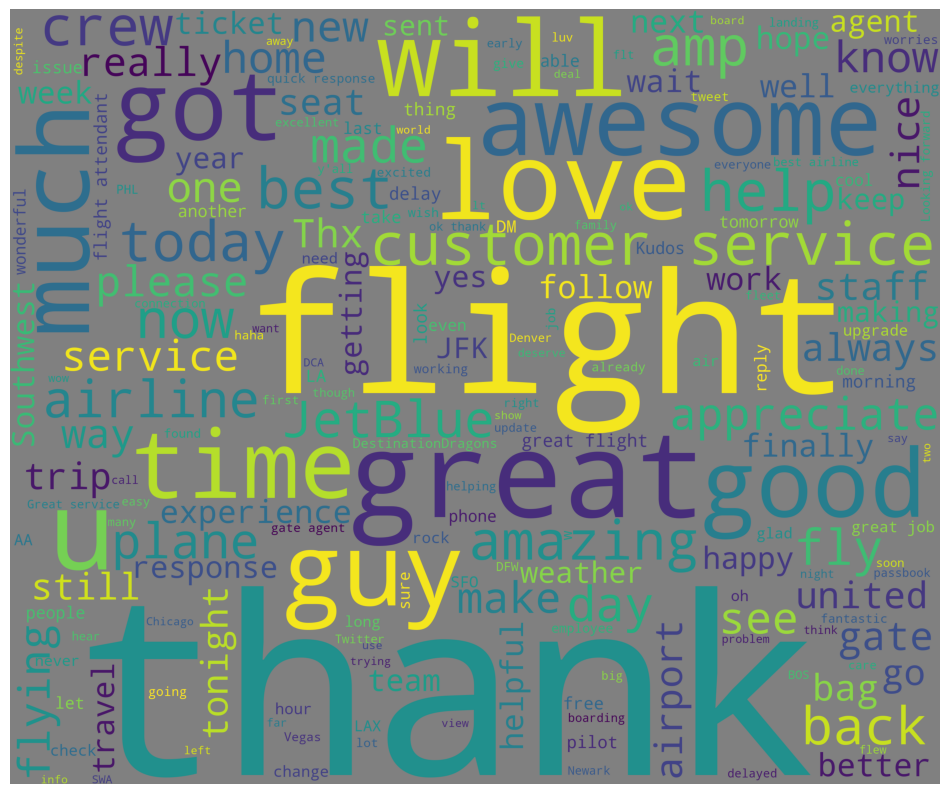

In [222]:
# Word_Cloud for +ve reasons
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='grey',
                      width=3000,
                      height=2500,
                      colormap='viridis'
                     ).generate(cleaned_word)
plt.figure(figsize=(12, 12))                    
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

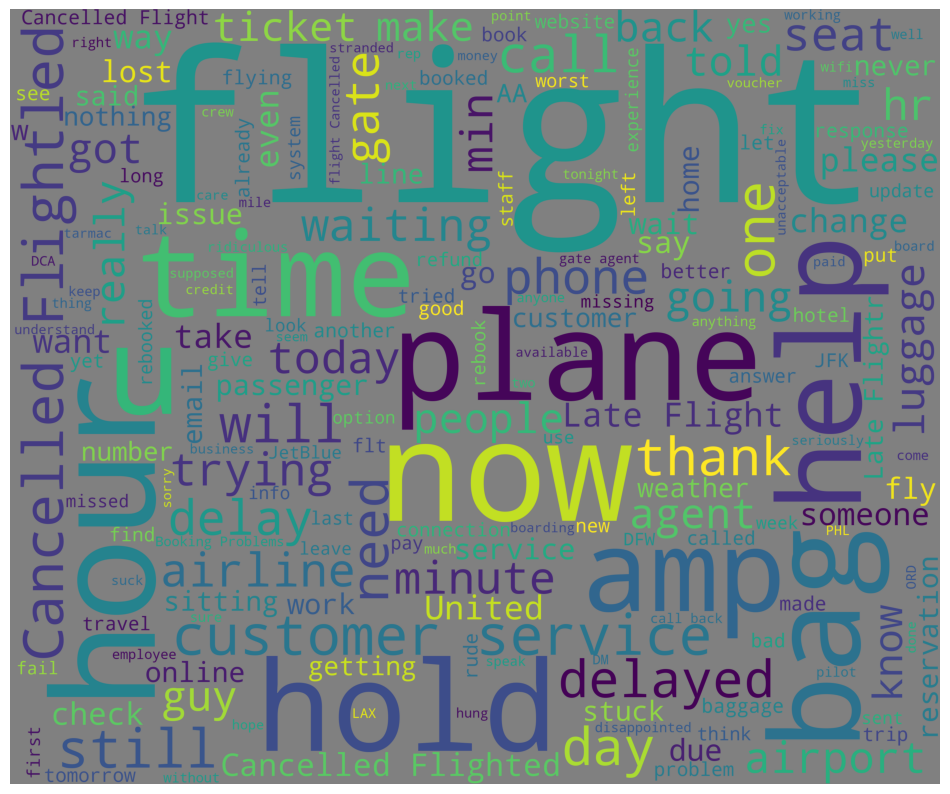

In [223]:
# Word_Cloud for neutral reasons
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='grey',
                      width=3000,
                      height=2500,
                      colormap='viridis'
                     ).generate(cleaned_word)
plt.figure(figsize=(12, 12))                    
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

negativereason
Customer Service Issue         2902
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

 		 Negative Reasons in each Airline




<Figure size 1100x500 with 0 Axes>

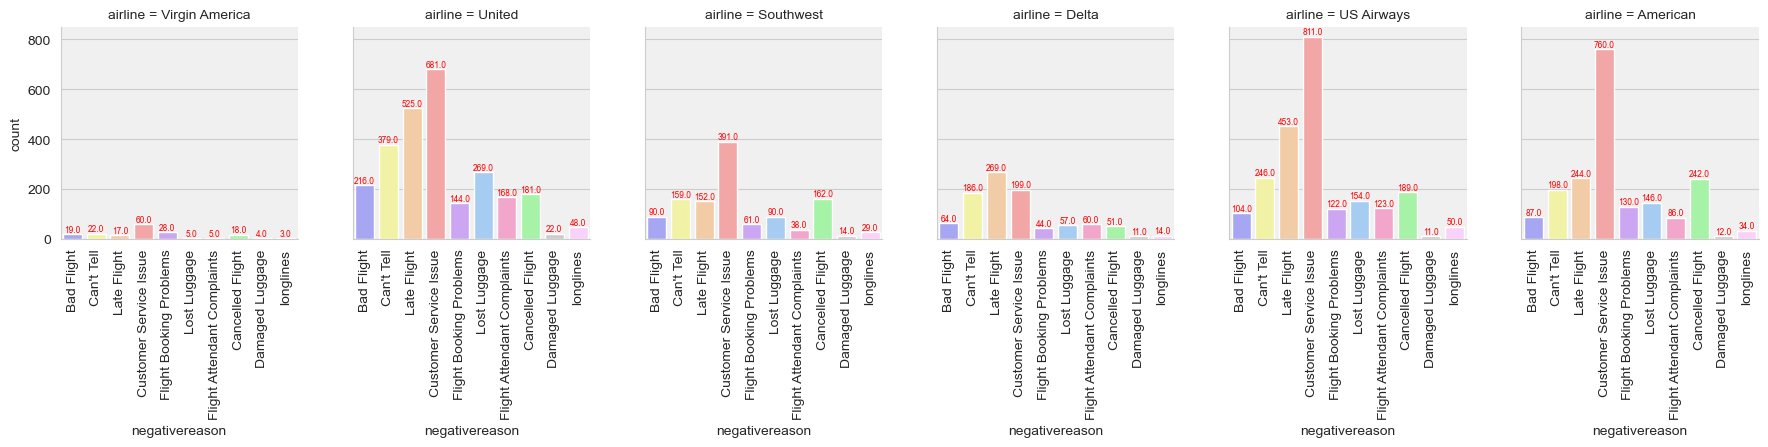

In [224]:
#get the number of negative reasons
print(df['negativereason'].value_counts())

# Define a color palette for each reason
color_mapping = {
    'Customer Service Issue': '#FF9999',  # Light Red
    'Late Flight': '#FFCC99',               # Light Orange
    "Can't Tell": '#FFFF99',                 # Light Yellow
    'Cancelled Flight': '#99FF99',           # Light Green
    'Lost Luggage': '#99CCFF',               # Light Blue
    'Bad Flight': '#9999FF',                 # Light Purple
    'Flight Booking Problems': '#CC99FF',    # Light Violet
    'Flight Attendant Complaints': '#FF99CC',# Light Pink
    'longlines': '#FFCCFF',                 # Light Magenta
    'Damaged Luggage': '#CCCCCC'             # Light Gray
}


# Negative Reasons in each Airline
print('\n \t\t Negative Reasons in each Airline\n\n')

plt.figure(figsize=(11,5))
g = sns.FacetGrid(df, col='airline', margin_titles=True)
g.map(sns.countplot, "negativereason",palette=color_mapping)

# Set subplot
for ax in g.axes.flat:
    ax.set_facecolor('#f0f0f0')  # Light gray background
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    
# Add text labels for each bar in the countplot
# Get the counts for each category in the axis
for ax in g.axes.flat:   
    for p in ax.patches:  # Iterate over each bar
        ax.annotate(format(p.get_height()),  # Get the height of the bar
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                    ha='center', va='bottom',  # Center the text horizontally and position it above the bar
                    fontsize=6, color='red')  # Text properties
    
plt.show()



---------------------------------------------------------------------------

**Is there a relationship between negative sentiments and date ?**

In [226]:
day_df = df.groupby(['tweet_created_date','airline']).agg(count=('airline_sentiment','value_counts')).reset_index()
print(day_df)

    tweet_created_date         airline airline_sentiment  count
0           2015-02-16           Delta          negative      1
1           2015-02-16           Delta           neutral      1
2           2015-02-16          United          negative      2
3           2015-02-17           Delta          negative    108
4           2015-02-17           Delta           neutral     86
..                 ...             ...               ...    ...
131         2015-02-24          United           neutral     49
132         2015-02-24          United          positive     25
133         2015-02-24  Virgin America          positive     13
134         2015-02-24  Virgin America          negative     10
135         2015-02-24  Virgin America           neutral      6

[136 rows x 4 columns]


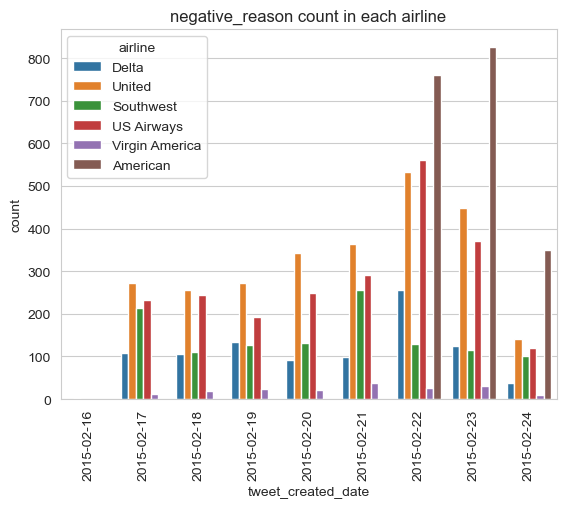

In [227]:
# negative_reason count in each airline
sns.barplot(data=day_df[day_df['airline_sentiment'] =='negative'],x= 'tweet_created_date',y='count',hue='airline')
plt.title('negative_reason count in each airline')
plt.xticks(rotation=90)
plt.show()


* Interestingly, American has a sudden upsurge in negative sentimental tweets on 2015-02-23, which reduced to half the very next day 2015-02-24. (I hope American is doing better these days and resolved their Customer Service Issue .
* Virgin America has the least number of negative tweets throughout the weekly data that we have. It should be noted that the total number of tweets for Virgin America was also significantly less as compared to the rest airlines, and hence the least negative tweets.
* The negative tweets for all the rest airlines is slightly skewed towards the end of the week !

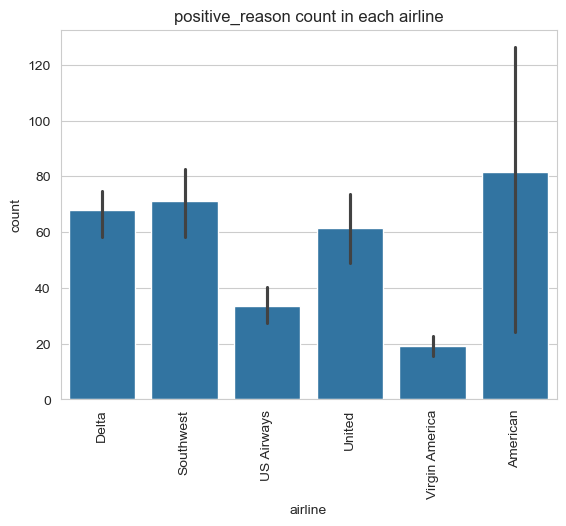

In [229]:
# positive_reason count in each airline
sns.barplot(data=day_df[day_df['airline_sentiment'] =='positive'],x= 'airline',y='count')
plt.title('positive_reason count in each airline')
plt.xticks(rotation=90)
plt.show()

* +ve tweet is highest for Americana, followed by Southwest and Delta airline 

# Model Development and Evaluation

In [232]:
# Let us now remove irrelevant columns
tweet_data = df.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
        'name', 'retweet_count','tweet_created', 'tweet_created_date',
       'tweet_location', 'user_timezone'], axis =1)

In [233]:
tweet_data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


## Text pre-processing:
* Html tag removal
* Tokenization
* Remove the numbers.
* Removal of Special Characters and Punctuations.
* Conversion to lowercase.
* Remove stopwords
* Lemmatize.
* join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
* Print first 5 rows of data after pre-processing.             essing.essing.

In [235]:
# import Regex, string and unicodedata.
import re, string, unicodedata  

# import BeautifulSoup.
from bs4 import BeautifulSoup 

# import contractions library.
import contractions 

# import Natural Language Tool-Kit.
import nltk                                                                         
nltk.download('punkt')

# import stopwords.
from nltk.corpus import stopwords  
# download Stopwords.
nltk.download('stopwords') 

# import Tokenizer.
from nltk.tokenize import word_tokenize, sent_tokenize   

#lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to C:\Users\Nusriya
[nltk_data]     Ubaid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Nusriya
[nltk_data]     Ubaid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nusriya
[nltk_data]     Ubaid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Html tag removal**

In [416]:
# define function for html cleanup
def perform_html_cleanup(raw_review):
  review_text = BeautifulSoup(raw_review).get_text()
  return review_text

**Replace Contraction**

In [239]:
# define functions to replace contractions
def replace_contractions(raw_review):
    return contractions.fix(raw_review)

**Tokenization**

In [241]:
# define functions for tokenization
def perform_tokenization(raw_review):
  word_tokens = word_tokenize(raw_review)  # Tokenization
  return word_tokens

**Removal of numbers**

In [243]:
# define function for removing numbers
def remove_numbers(list_of_words): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

**Removal of Special Characters**

In [245]:
# define functions to remove special characters
def remove_special_character(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

**Removal of Punctuations**

In [247]:
# define function to remove punctuation
def remove_punctuation(words):
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

**Conversion to lowercase**

In [249]:
# define function to converting to lowercase
def to_lowercase(words):
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

**Removal of stopwords**

In [251]:
# define the function to remove the stop words
def remove_stopwords(words):
    stoplist = set(stopwords.words("english"))
    new_words = []
    for word in words:
        if word not in stoplist:
            new_words.append(word)
    return new_words

**Removal of empty strings**

In [253]:
# define function to remove the empty strings
def remove_empty_string(words):
  return list(filter(None, words))

**Lemmatize**

In [255]:
# define function for lematizing
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

**Define driver function for pre processing**

In [257]:
# define a cleanup function to call all the preprocessors sequentially.
def perform_cleanup(raw_review):
    clean_review = perform_html_cleanup(raw_review)
    clean_review = replace_contractions(clean_review)
    clean_review = perform_tokenization(clean_review)
    clean_review = remove_numbers(clean_review)
    clean_review = remove_special_character(clean_review)
    clean_review = remove_punctuation(clean_review)
    clean_review = to_lowercase(clean_review)
    clean_review = remove_stopwords(clean_review)
    clean_review = remove_empty_string(clean_review)
    clean_review = lemmatize_verbs(clean_review)
    return clean_review

In [258]:
# function call

clean_reviews = []

# loop through the data and cleanup and join
for i, row in tweet_data.iterrows():
    words = tweet_data.at[i, 'text']
    words = perform_cleanup(words)
    tweet_data.at[i,'text'] = " ".join(words)
    clean_reviews.append(tweet_data.at[i, 'text'])

In [259]:
# display first 5 rows
tweet_data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica today must mean need take anothe...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


## Vectorization

In [261]:

#tweet_data.text
#y=tweet_data.airline_sentiment


In [262]:
# vectorize independent var
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

# We use the top 5000 most frequently occuring words to create our bag of words model
# max_df specifies that only use those words that occur in a maximum of 80% of the documents.
# min-df is set to 7 which shows that include words that occur in at least 7 documents. 

In [263]:
# We use the vectorizer.fit_transform to transform our words into our processed features vector
vectorized_data = vectorizer.fit_transform(tweet_data.text).toarray()

### Train-Test_split

In [265]:
# separate independent and dependent var
x = vectorized_data 
y = tweet_data.airline_sentiment

In [266]:
#import library
from sklearn.model_selection import train_test_split

In [267]:
#split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=40) 

## Training Algorithm-DecisionTreeClassifier

In [269]:
from sklearn.tree import DecisionTreeClassifier
dtree_model= DecisionTreeClassifier(random_state=42)
dtree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [270]:
#prediction
y_predict=dtree_model.predict(x_test)

In [271]:
#comparing Actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_predict})
comp_df.head()

,Actual_data,Predicted_data
9957,negative,positive
12354,negative,negative
6716,neutral,negative
6805,positive,negative
418,negative,negative


#### Evaluating the Model

In [273]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
print(cm,'\n')
# Plot confusion matrix


[[2163  394  167]
 [ 481  373  109]
 [ 194  121  379]] 



In [274]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

    negative       0.76      0.79      0.78      2724
     neutral       0.42      0.39      0.40       963
    positive       0.58      0.55      0.56       694

    accuracy                           0.67      4381
   macro avg       0.59      0.58      0.58      4381
weighted avg       0.66      0.67      0.66      4381



In [275]:
from sklearn.metrics import accuracy_score
dtree_accuracy_score=accuracy_score(y_test, y_predict)
print("Accuracy_score_DTree:",dtree_accuracy_score)

Accuracy_score_DTree: 0.6653732024651906


## Training Algorithm-RandomForestClassifier

In [277]:
from sklearn.ensemble import RandomForestClassifier

In [278]:
rf_model= RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [279]:
#prediction
y_predict=rf_model.predict(x_test)

In [280]:
#comparing Actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_predict})
comp_df.head()

,Actual_data,Predicted_data
9957,negative,negative
12354,negative,negative
6716,neutral,negative
6805,positive,negative
418,negative,negative


#### Evaluating the Model

In [282]:
#confusion_matrix and classification_report
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[2523  135   66]
 [ 534  352   77]
 [ 216   84  394]]
              precision    recall  f1-score   support

    negative       0.77      0.93      0.84      2724
     neutral       0.62      0.37      0.46       963
    positive       0.73      0.57      0.64       694

    accuracy                           0.75      4381
   macro avg       0.71      0.62      0.65      4381
weighted avg       0.73      0.75      0.73      4381



In [283]:
rf_accuracy_score=accuracy_score(y_test, y_predict)
print("Accuracy_score_RF:",rf_accuracy_score)

Accuracy_score_RF: 0.7461766719926958


## Hyper-Parameter Tuning

* To find the best combination of hyper parameters to optimize the model's performance
* RandomSearch

### Random_Search

In [286]:
# RANDOM_SEARCH
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

rnd_search = RandomizedSearchCV(rf_model, param_distributions=param_distribs, n_iter=5, cv=5, random_state=42)
rnd_search.fit( x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D00CDB50A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D018E75880>},
                   random_state=42)

In [287]:
#The best hyperparameter combination found:
print('\n Best estimator:',rnd_search.best_estimator_)


 Best estimator: RandomForestClassifier(max_features=7, n_estimators=180, random_state=42)


In [288]:
#prediction
rnd_search_model=rnd_search.best_estimator_
y_predict=rnd_search_model.predict(x_test)
#comparing Actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_predict})
comp_df.head()

,Actual_data,Predicted_data
9957,negative,negative
12354,negative,negative
6716,neutral,negative
6805,positive,negative
418,negative,negative


#### Evaluating the Model

In [290]:
#confusion_matrix and classification_report
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[2589  108   27]
 [ 556  344   63]
 [ 268   73  353]]
              precision    recall  f1-score   support

    negative       0.76      0.95      0.84      2724
     neutral       0.66      0.36      0.46       963
    positive       0.80      0.51      0.62       694

    accuracy                           0.75      4381
   macro avg       0.74      0.61      0.64      4381
weighted avg       0.74      0.75      0.72      4381



In [291]:
rf1_accuracy_score=accuracy_score(y_test, y_predict)
print("Accuracy_score_RF_1:",rf1_accuracy_score)

Accuracy_score_RF_1: 0.750057064597124


### Final_model selection

In [293]:
# Dataframe to select the final_model
result=pd.DataFrame({'Model':['DecisionTreeClassifier','RandomForestClassifier','RandomizedSearch'],
                     'Accuracy_score':[dtree_accuracy_score,rf_accuracy_score,rf1_accuracy_score]})
result                    

,Model,Accuracy_score
0,DecisionTreeClassifier,0.665373
1,RandomForestClassifier,0.746177
2,RandomizedSearch,0.750057


In [294]:
# final model is RandomizedSearch_RandomForestClassifier
# as its  accuracy_score is slightly high compared to other models
final_model=rnd_search_model
final_model

RandomForestClassifier(max_features=7, n_estimators=180, random_state=42)

###  Sample Data to the Classifier

In [411]:
# Obtain a test sample text from our test dataset

rand_index = np.random.randint(0,len(tweet_data.text))
test_sample = tweet_data.text[rand_index]
print(test_sample)

americanair thank much


In [413]:
# Try our classifer on our text
vector = vectorizer.transform([test_sample])
output = final_model.predict(vector.toarray())
print("Sentiment is - " + str(output[0]))

Sentiment is - positive
